<a href="https://colab.research.google.com/github/kshitijrajsharma/fairpredictor/blob/main/fAIr_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fairpredictor

Efficientnet is only required for collab

**Note** : Tensorflow tested upto version `2.12.0` and efficientnet tested upto `1.0.8` only 

In [2]:
!pip install efficientnet

In [3]:
from predictor import predict

2024-03-22 14:14:28.832331: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 14:14:28.880048: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 14:14:28.880981: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 14:14:29.762856: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TFlite_runtime is not installed , Predictions with .tflite extension won't work
Raster2polygon is not installed. This option won't be available in postprocessing


## Download Your local model
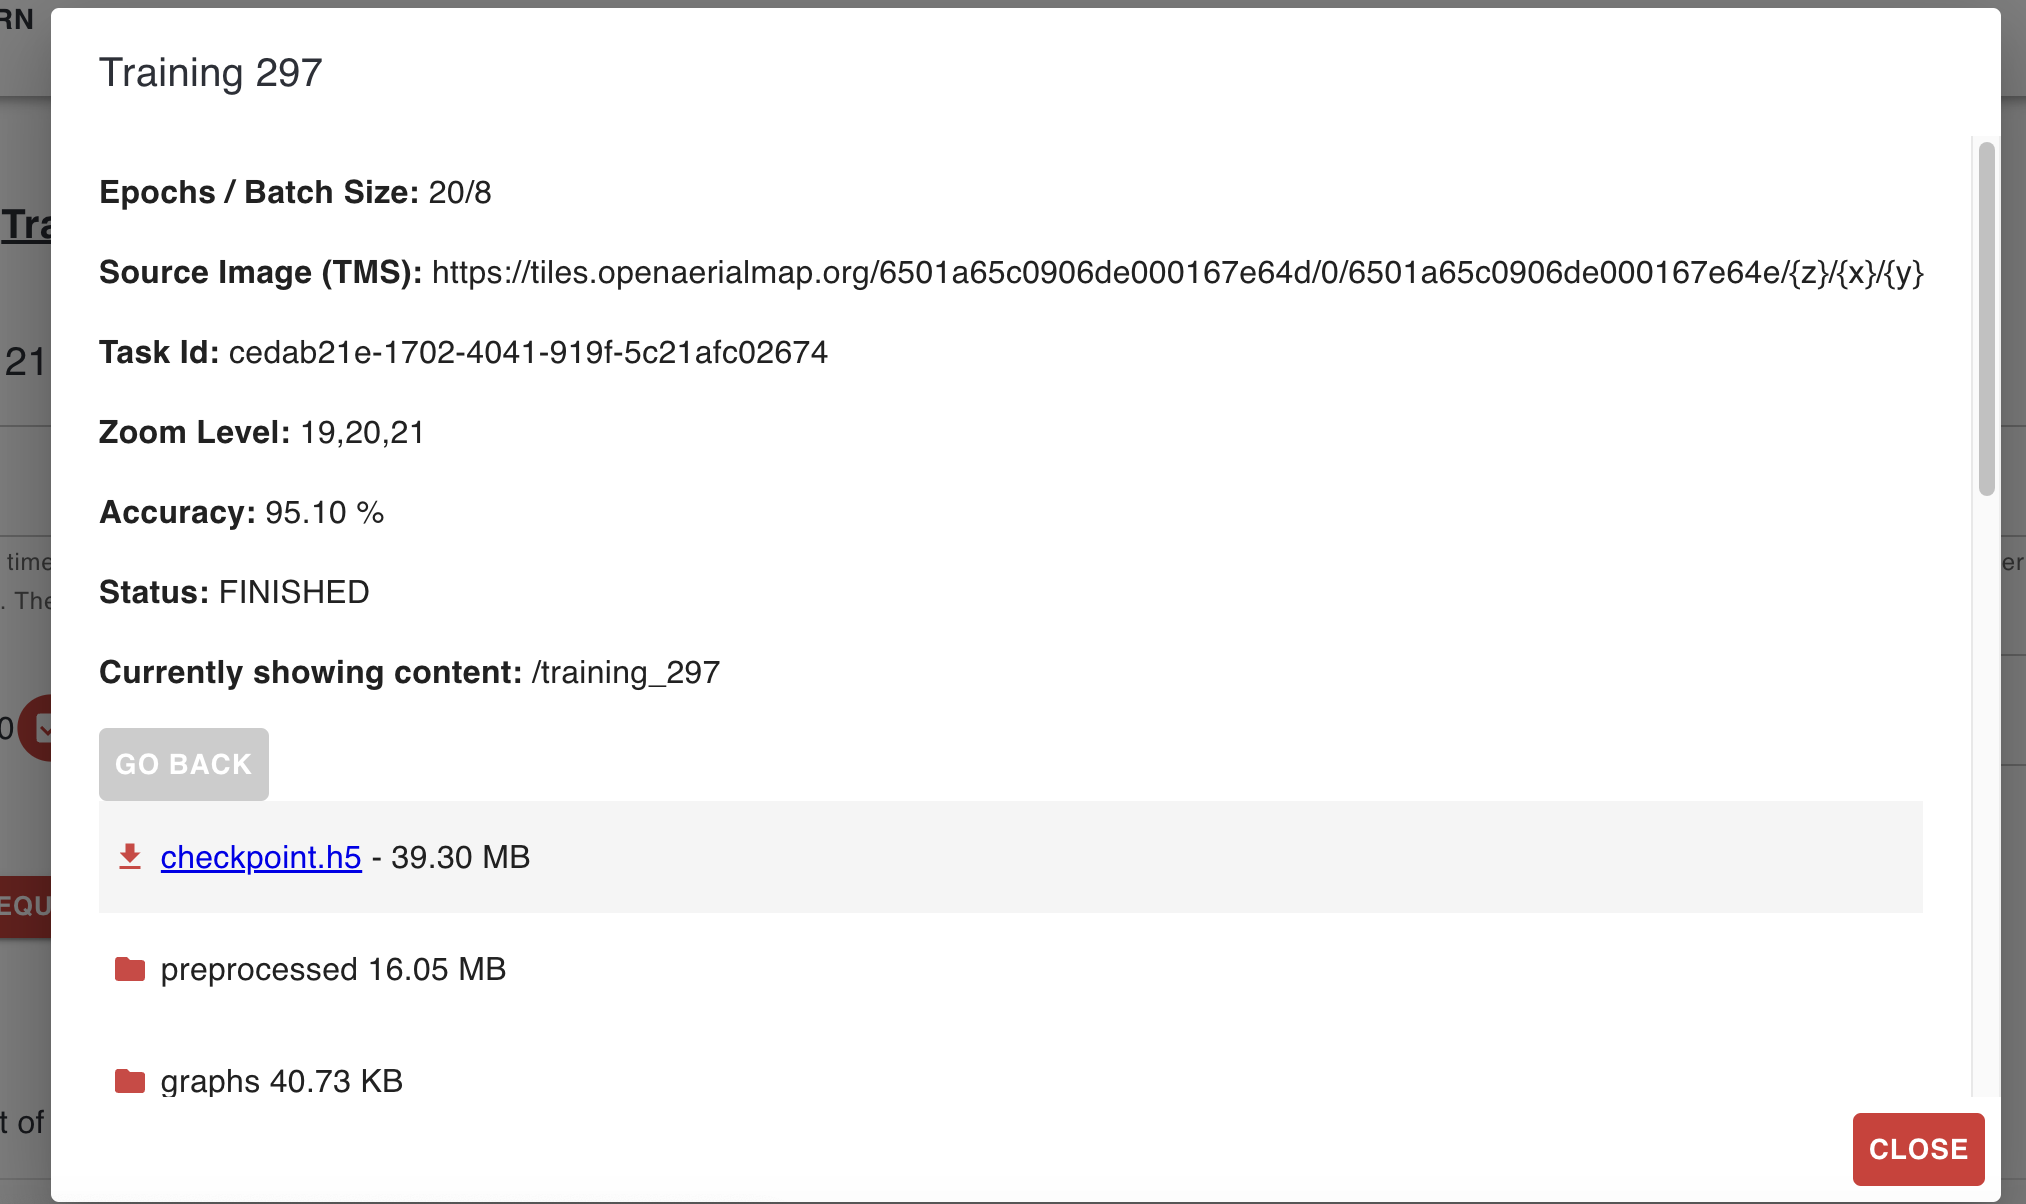

In [ ]:
import requests
import shutil
url='https://fair-dev.hotosm.org/api/v1/workspace/download/dataset_65/output/training_297/checkpoint.h5'

response = requests.get(url, stream=True)

with open('checkpoint.h5', 'wb') as out_file:
  shutil.copyfileobj(response.raw, out_file)


**Parameters**
* **bbox** : Bounding box of the area you want to run prediction on
* **model_path** : Path of your downloaded model checkpoint
* **zoom_level** : Zoom level of the tiles to be used for prediction
* **tms_url** : Your Image URL on which you want to detect feature

In [4]:
bbox=[100.56228021333352,13.685230854641182,100.56383321235313,13.685961853747969]
model_path='checkpoint.h5'
zoom_level=20
tms_url='https://tiles.openaerialmap.org/6501a65c0906de000167e64d/0/6501a65c0906de000167e64e/{z}/{x}/{y}'


In [11]:
import efficientnet.keras as efn
import json

In [12]:
my_predictions=predict(bbox,model_path,zoom_level,tms_url)
print(json.dumps(my_predictions))

Download starting from [817196, 484042] to [817201, 484040] using source https://tiles.openaerialmap.org/6501a65c0906de000167e64d/0/6501a65c0906de000167e64e/{z}/{x}/{y} - 20
Using : checkpoint.h5
It took 2 sec to load model
1/1 [==============================] - 0s 202ms/step
It took 4 sec to predict with 0.5 Confidence Threshold


Georeferencing for prediction:   0%|          | 0/18 [00:00<?, ?it/s]/home/kshitij/disk/hotosm/fairpredictor/env/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
Georeferencing for prediction: 100%|██████████| 18/18 [00:00<00:00, 83.93it/s]


It took 0 sec to georeference
It took 1 sec to extract polygons
{"type": "FeatureCollection", "crs": {"type": "name", "properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}}, "features": [{"type": "Feature", "properties": {"building": "yes", "source": "fAIr"}, "geometry": {"type": "Polygon", "coordinates": [[[100.56222720228901, 13.686020496129162], [100.56276650331326, 13.686020496129162], [100.56274352557539, 13.686017869619954], [100.56274352557539, 13.68601130334681], [100.56271919620586, 13.685994231035776], [100.5626894603098, 13.685961399664919], [100.56269081194145, 13.685946953860286], [100.56267729562504, 13.685948267115291], [100.5626691858352, 13.685941700840203], [100.56267729562504, 13.685928568289478], [100.56269216357308, 13.685931194799682], [100.56277190983981, 13.686013929856086], [100.5627813712613, 13.68601655636534], [100.56277326147146, 13.686020496129162], [100.56280434899917, 13.686020496129162], [100.56278542615622, 13.686017869619954], [100.5628057006308, 13

In [7]:
!pip install matplotlib

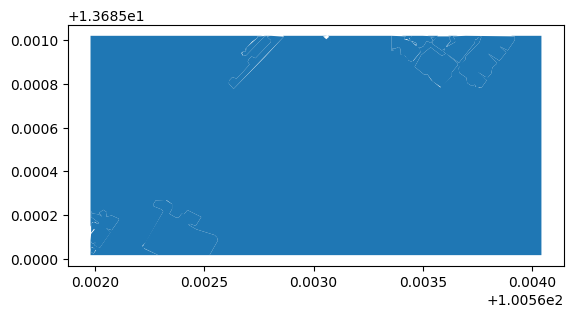

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.GeoDataFrame.from_features(my_predictions)
gdf.plot()
plt.show()